In [5]:
import pandas as pd

In [6]:
path = 'C:/Users/trmyi/Desktop/AI_class/project/house_prediction/'
#https://data.gov.tw/dataset/137371 READ DESCRIPTIONS OF COLUMNS
df = pd.read_csv(path+'housepropertydata_v2.csv')

In [7]:
df.head()

,Unnamed: 0,District,MainMaterial,B_area,LivingR,BathR,Price,PropertyType2,log_Price,log_B_area
0,0,中和區,鋼筋混凝土造,89.65,1,2,13900000.0,住宅大樓,16.447399,4.495913
1,1,新店區,鋼筋混凝土造,103.21,2,2,5000000.0,公寓,15.424948,4.636766
2,2,中和區,鋼筋混凝土造,57.60,1,1,4500000.0,公寓,15.319588,4.053523
3,3,八里區,鋼筋混凝土造,120.18,1,1,5350000.0,華廈,15.492607,4.788991
4,4,蘆洲區,鋼筋混凝土造,98.32,1,2,9500000.0,公寓,16.066802,4.588227


In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.columns

Index(['District', 'MainMaterial', 'B_area', 'LivingR', 'BathR', 'Price',
       'PropertyType2', 'log_Price', 'log_B_area'],
      dtype='object')

In [10]:
df1_columns = ['District', 'MainMaterial', 'B_area', 'LivingR', 'BathR', 'Price',
       'PropertyType2']

In [11]:
df1 = df[df1_columns]

In [12]:
df1 = pd.get_dummies(df1)

In [13]:
 df1_x = df1.drop(columns=['Price'])

In [14]:
df1_y = df1[['Price']]

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

In [16]:
 df1_x_train, df1_x_test, df1_y_train, df1_y_test = train_test_split(df1_x, df1_y, test_size=0.2, random_state=0)

In [17]:
print("Shape of X_train: ",df1_x_train.shape)
print("Shape of X_test: ", df1_x_test.shape)
print("Shape of y_train: ",df1_y_train.shape)
print("Shape of y_test: ", df1_y_test.shape)

Shape of X_train:  (4951, 41)
Shape of X_test:  (1238, 41)
Shape of y_train:  (4951, 1)
Shape of y_test:  (1238, 1)


In [18]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(df1_x_train, df1_y_train)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = df1_x_train, y = df1_y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(df1_x_train)
r2_score_linear_train = r2_score(df1_y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(df1_x_test)
r2_score_linear_test = r2_score(df1_y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(df1_y_test, y_pred_linear_test)))

print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7260264597205457
R2_score (train):  0.7406932086853739
R2_score (test):  0.7308690063748233
RMSE:  2470855.5492998855


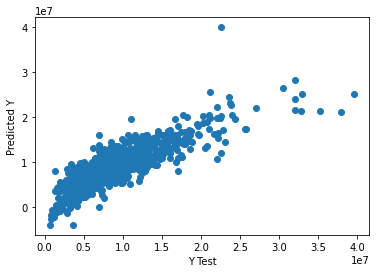

In [22]:
import matplotlib.pyplot as plt

#predictions = lm.predict(X_test)
plt.scatter(df1_y_test,y_pred_linear_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [23]:
df2_columns = ['District', 'MainMaterial', 'log_B_area', 'LivingR', 'BathR', 'log_Price',
       'PropertyType2']

In [24]:
df2 = df[df2_columns]
df2 = pd.get_dummies(df2)

df2_x = df2.drop(columns=['log_Price'])
df2_y = df2[['log_Price']]

In [25]:
 df2_x_train, df2_x_test, df2_y_train, df2_y_test = train_test_split(df2_x, df2_y, test_size=0.2, random_state=0)

In [26]:
print("Shape of X_train: ",df1_x_train.shape)
print("Shape of X_test: ", df1_x_test.shape)
print("Shape of y_train: ",df1_y_train.shape)
print("Shape of y_test: ", df1_y_test.shape)

Shape of X_train:  (4951, 41)
Shape of X_test:  (1238, 41)
Shape of y_train:  (4951, 1)
Shape of y_test:  (1238, 1)


In [27]:
regressor_linear.fit(df2_x_train, df2_y_train)

LinearRegression()

In [28]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = df2_x_train, y = df2_y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(df2_x_train)
r2_score_linear_train = r2_score(df2_y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(df2_x_test)
r2_score_linear_test = r2_score(df2_y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(df2_y_test, y_pred_linear_test)))

print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.8142138000322303
R2_score (train):  0.7922790459963063
R2_score (test):  0.7563838045835735
RMSE:  0.27090444011436265


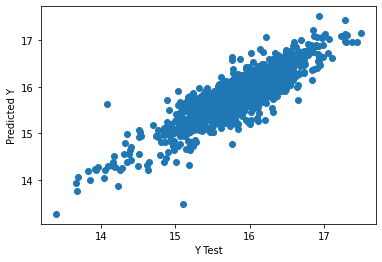

In [29]:
#predictions = lm.predict(X_test)
plt.scatter(df2_y_test,y_pred_linear_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [30]:
pd.concat([np.exp(df['log_Price']), df['Price']],axis = 1).head()

,log_Price,Price
0,13900000.0,13900000.0
1,5000000.0,5000000.0
2,4500000.0,4500000.0
3,5350000.0,5350000.0
4,9500000.0,9500000.0


In [31]:
df2.head()

,log_B_area,LivingR,BathR,log_Price,District_三峽區,District_三芝區,District_三重區,District_中和區,District_五股區,District_八里區,...,MainMaterial_鋼筋混凝土造,MainMaterial_鋼骨混凝土造,MainMaterial_鋼骨鋼筋混凝土造,PropertyType2_住宅大樓,PropertyType2_公寓,PropertyType2_其他,PropertyType2_套房,PropertyType2_店面,PropertyType2_華廈,PropertyType2_透天厝
0,4.495913,1,2,16.447399,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,4.636766,2,2,15.424948,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,4.053523,1,1,15.319588,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,4.788991,1,1,15.492607,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,4.588227,1,2,16.066802,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [32]:
df2.columns

Index(['log_B_area', 'LivingR', 'BathR', 'log_Price', 'District_三峽區',
       'District_三芝區', 'District_三重區', 'District_中和區', 'District_五股區',
       'District_八里區', 'District_土城區', 'District_新店區', 'District_新莊區',
       'District_板橋區', 'District_林口區', 'District_樹林區', 'District_永和區',
       'District_汐止區', 'District_泰山區', 'District_淡水區', 'District_深坑區',
       'District_瑞芳區', 'District_石門區', 'District_萬里區', 'District_蘆洲區',
       'District_金山區', 'District_雙溪區', 'District_鶯歌區', 'MainMaterial_加強磚造',
       'MainMaterial_土造', 'MainMaterial_磚造', 'MainMaterial_見其他登記事項',
       'MainMaterial_鋼筋混凝土造', 'MainMaterial_鋼骨混凝土造', 'MainMaterial_鋼骨鋼筋混凝土造',
       'PropertyType2_住宅大樓', 'PropertyType2_公寓', 'PropertyType2_其他',
       'PropertyType2_套房', 'PropertyType2_店面', 'PropertyType2_華廈',
       'PropertyType2_透天厝'],
      dtype='object')

In [33]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df2_scaled = df2.copy()
df2_scaled[['log_B_area', 'LivingR', 'BathR', 'log_Price']]= scale.fit_transform(df2_scaled[['log_B_area', 'LivingR', 'BathR', 'log_Price']])
df2_scaled.head()


,log_B_area,LivingR,BathR,log_Price,District_三峽區,District_三芝區,District_三重區,District_中和區,District_五股區,District_八里區,...,MainMaterial_鋼筋混凝土造,MainMaterial_鋼骨混凝土造,MainMaterial_鋼骨鋼筋混凝土造,PropertyType2_住宅大樓,PropertyType2_公寓,PropertyType2_其他,PropertyType2_套房,PropertyType2_店面,PropertyType2_華廈,PropertyType2_透天厝
0,-0.315308,-1.029652,0.423699,1.134846,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.016815,0.540320,0.423699,-0.675205,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-1.252820,-1.029652,-0.780283,-0.861726,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.305779,-1.029652,-0.780283,-0.555429,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,-0.119677,-1.029652,0.423699,0.461073,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [34]:
df2_scaled_x = df2_scaled.drop(columns=['log_Price'])
df2_scaled_y = df2_scaled[['log_Price']]

In [35]:
df2_scaled_x_train, df2_scaled_x_test, df2_scaled_y_train, df2_scaled_y_test = train_test_split(df2_scaled_x, df2_scaled_y, test_size=0.2, random_state=0)

In [36]:
regressor_linear.fit(df2_scaled_x_train, df2_scaled_y_train)

LinearRegression()

In [37]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = df2_scaled_x_train, y = df2_scaled_y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(df2_scaled_x_train)
r2_score_linear_train = r2_score(df2_scaled_y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(df2_scaled_x_test)
r2_score_linear_test = r2_score(df2_scaled_y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(df2_scaled_y_test, y_pred_linear_test)))

print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.8142152471523418
R2_score (train):  0.8249586961629729
R2_score (test):  0.7980265814695211
RMSE:  0.4366752495683386


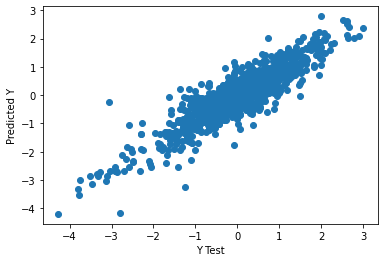

In [38]:
plt.scatter(df2_scaled_y_test,y_pred_linear_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [39]:
df2_scaled_x_test

,log_B_area,LivingR,BathR,District_三峽區,District_三芝區,District_三重區,District_中和區,District_五股區,District_八里區,District_土城區,...,MainMaterial_鋼筋混凝土造,MainMaterial_鋼骨混凝土造,MainMaterial_鋼骨鋼筋混凝土造,PropertyType2_住宅大樓,PropertyType2_公寓,PropertyType2_其他,PropertyType2_套房,PropertyType2_店面,PropertyType2_華廈,PropertyType2_透天厝
4338,0.237872,0.540320,0.423699,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3497,0.849346,0.540320,0.423699,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3657,-0.218960,-1.029652,0.423699,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5621,0.020633,0.540320,-0.780283,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4587,1.981589,0.540320,0.423699,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,-2.404540,-2.599624,-1.984266,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2465,1.430740,0.540320,0.423699,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5099,1.654154,0.540320,1.627682,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5938,1.106518,0.540320,0.423699,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [40]:
df2_scaled_x_test.loc[[4338]]

,log_B_area,LivingR,BathR,District_三峽區,District_三芝區,District_三重區,District_中和區,District_五股區,District_八里區,District_土城區,...,MainMaterial_鋼筋混凝土造,MainMaterial_鋼骨混凝土造,MainMaterial_鋼骨鋼筋混凝土造,PropertyType2_住宅大樓,PropertyType2_公寓,PropertyType2_其他,PropertyType2_套房,PropertyType2_店面,PropertyType2_華廈,PropertyType2_透天厝
4338,0.237872,0.54032,0.423699,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [41]:
regressor_linear.predict(df2_scaled_x_test.loc[[4338]])[0][0]

-0.38548917536650606

In [42]:
df2_scaled_y_test.loc[[4338]]

,log_Price
4338,-0.732781
